In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 8]
sns.set_style("darkgrid")

# Uniform Weights

In [2]:
m = 20 # Number of measurements 
n = 100  # Dimension of signal
K = 10  # Number of non-zero  coefficents 
T = 10 # Number of signals
num_trials = 10 # Number of trials over which to average results
weight_const = np.arange(1, 0, -0.1) # Testing different weights
save_results = 1


# Initialization
errMatSMV = np.zeros((num_trials, len(weight_const)))
errMatMMV = np.zeros((num_trials, len(weight_const)))

# For each weight, use CVX to solve min program
for trial in range(num_trials):
    
    # Create MMV Problem
    A = np.matrix(np.random.normal(0, 1, (m, n))) # measurement matrix
    indx = np.random.choice(n, K, replace=False) # support locations chosen uniformly at random
    
    X = np.matrix(np.zeros((n, T)))
    X[indx, :] = np.random.normal(0, 1, (K, T))
    sigma = 0.1
    noise = np.random.normal(0, 1, (m, T))*sigma
    Y = A*X + noise

    for jj in range(len(weight_const)):
        # L21
        # Set Weights
        w = np.ones((n,1))
        w[indx] = weight_const[jj]
        
        # Use CVXpy
        Xhat = cp.Variable((n,T))
        objective = w.T*cp.norm(Xhat.T, p=2, axis=0) #
        constraint = [cp.norm(Y-A*Xhat, 'fro')**2 <= sigma**2]
        problem = cp.Problem(cp.Minimize(objective), constraint)
        results = problem.solve()

        # Metrics
        errMatMMV[trial, jj] = np.linalg.norm(Xhat.value - X,'fro')/np.linalg.norm(X,'fro')

Text(0,0.5,'CVXpy Relative Error')

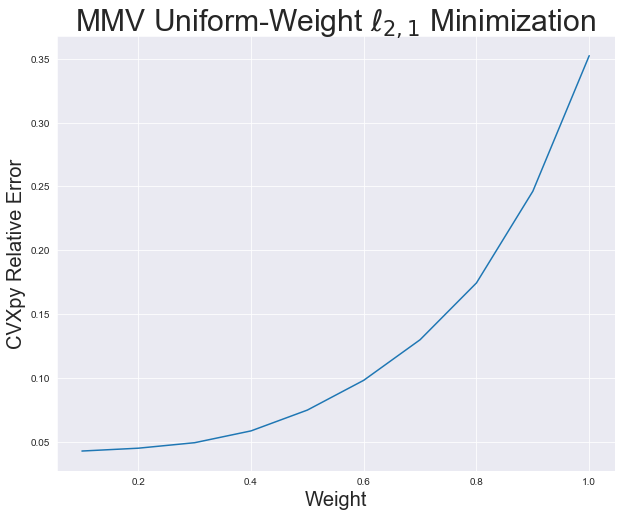

In [4]:
ax = sns.lineplot(x=weight_const, y=errMatMMV.mean(axis=0))
ax.set_title("MMV Uniform-Weight $\ell_{2,1}$ Minimization", fontsize=30)
ax.set_xlabel("Weight", fontsize=20)
ax.set_ylabel("CVXpy Relative Error", fontsize=20)

# Optimized Weights